## OLS Regression
### One response variable and one predictor variable

In [2]:
import numpy as np
import matplotlib.pyplot as plot #Provides a MATLAB-like plotting framework.

### create dummy data

In [3]:
from sklearn import datasets as skds

In [4]:
X,y=skds.make_regression(n_samples=200,n_features=1,n_informative=1,n_targets=1,noise=20.0)
## 200 values each for the target and predictor variable

### Reshape numpyarray to have 2D.

In [5]:
if(y.ndim==1):
    y=y.reshape(len(y),1)

### Plotting

In [6]:
# not necessary

plot.figure(figsize=(15,9))

<Figure size 1080x648 with 0 Axes>

<Figure size 1080x648 with 0 Axes>

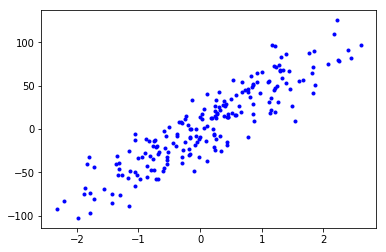

In [7]:
plot.plot(X,y,'.b') # plot x and y using blue circle markers

### Split data into training & testing dataset

In [8]:
# Split arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)
## Test_size: If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split.
## Test_size: Set aside 30% dataset for testing
## Randrom_state: If int, random_state is the seed used by the random number generator.

### Defining inputs, parameters and other variables

In [10]:
num_outputs=y_train.shape[1] #one response variable
num_inputs=X_train.shape[1] #one predictor

### Use placeholders

In [11]:
import tensorflow as tf
## Inserts a placeholder for a tensor that will be always fed.
## Returns a Tensor that may be used as a handle for feeding a value, but not evaluated directly.

### Define equation: y=W*x + b

In [12]:
x_tensor=tf.placeholder(dtype=tf.float32, shape=[None,num_inputs],name="x")
## tf placeholder to accomodate the input

In [13]:
y_tensor=tf.placeholder(dtype=tf.float32, shape=[None,num_outputs],name="y")
## response variable

In [14]:
w=tf.Variable(tf.zeros([num_inputs,num_outputs]),dtype=tf.float32,name="w")
b=tf.Variable(tf.zeros([num_outputs]),dtype=tf.float32,name="b")

In [15]:
model=tf.matmul(x_tensor,w)+b #y=W*x + b 

### Define loss function
### Mean squared error/residual
### residual=(Y)predict-(Y)actual;  residual=model-y_tensor

In [16]:
loss=tf.reduce_mean(tf.square(model-y_tensor)) # Mean squared error (MSE)

In [17]:
mse=tf.reduce_mean(tf.square(model-y_tensor)) # Mean squared error (MSE)

In [18]:
# Total sum of squares (SST or TSS)
y_mean=tf.reduce_mean(y_tensor)
total_error=tf.reduce_sum(tf.square(y_tensor-y_mean))

In [19]:
# Residual sum of squares (SSR or RSS)
unexplained_error=tf.reduce_sum(tf.square(y_tensor-model))

In [20]:
# R-Squared. R-Squared = 1 - (Explained Variation / Total Variation)
# R-Squared = 1-(SSR/SST)
rsq=1-tf.div(unexplained_error,total_error)

### Define optimizer function.

In [21]:
learning_rate=0.001

In [22]:
optimizer=tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
## gradient descent is an algorithm that minimizes functions
## learning rate is the step we take per iteration

### Train the model

In [23]:
num_epochs=1800 ## number of iterations to run the training for
## An epoch means using the whole data you have

In [24]:
## w_hat and b_hat: estimates of w and b
# initial values = 0
w_hat=0 
b_hat=0

In [25]:
loss_epochs=np.empty(shape=[num_epochs],dtype=float)
mse_epochs=np.empty(shape=[num_epochs],dtype=float)
rs_epochs=np.empty(shape=[num_epochs],dtype=float)

In [26]:
#initial values
mse_score=0
rsq_score=0

In [27]:
with tf.Session() as tfs:
    tfs.run(tf.global_variables_initializer())#run optimizer/loop on training data
    for epoch in range(num_epochs):
        feed_dict = {x_tensor: X_train, y_tensor: y_train}
        loss_val, _ = tfs.run([loss, optimizer], feed_dict=feed_dict)
        loss_epochs[epoch] = loss_val #calculate and store error

        feed_dict = {x_tensor: X_test, y_tensor: y_test}
        mse_score, rsq_score = tfs.run([mse, rsq], feed_dict=feed_dict)
        mse_epochs[epoch] = mse_score
        rs_epochs[epoch] = rsq_score

    w_hat, b_hat = tfs.run([w, b]) #final values of w and b obtained after all iterations
    w_hat = w_hat.reshape(1)

print('model : Y = {0:.8f} X + {1:.8f}'.format(w_hat[0], b_hat[0]))
print('For test data : MSE = {0:.8f}, R2 = {1:.8f} '.format(
    mse_score, rsq_score))

model : Y = 40.21276855 X + 0.74979872
For test data : MSE = 426.37124634, R2 = 0.77439755 


## Visualization of OLS

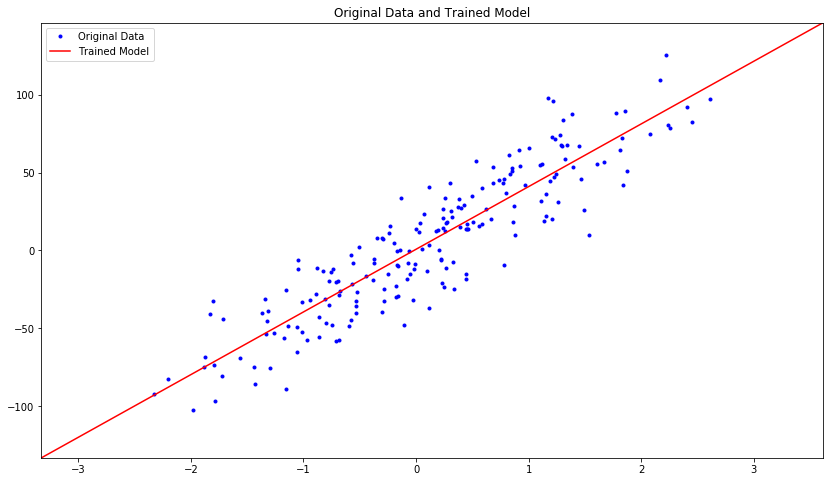

In [29]:
plot.figure(figsize=(14, 8)) # figure size
plot.title('Original Data and Trained Model') # figure title
x_plot = [np.min(X) - 1, np.max(X) + 1] #range of X values
y_plot = w_hat * x_plot + b_hat #w_hat and b_hat predicted before 
plot.axis([x_plot[0], x_plot[1], y_plot[0], y_plot[1]])
plot.plot(X, y, 'b.', label='Original Data')
plot.plot(x_plot, y_plot, 'r-', label='Trained Model')
plot.legend()
plot.show()

### Loss function on training data
### Mean squared error (MSE) on test data

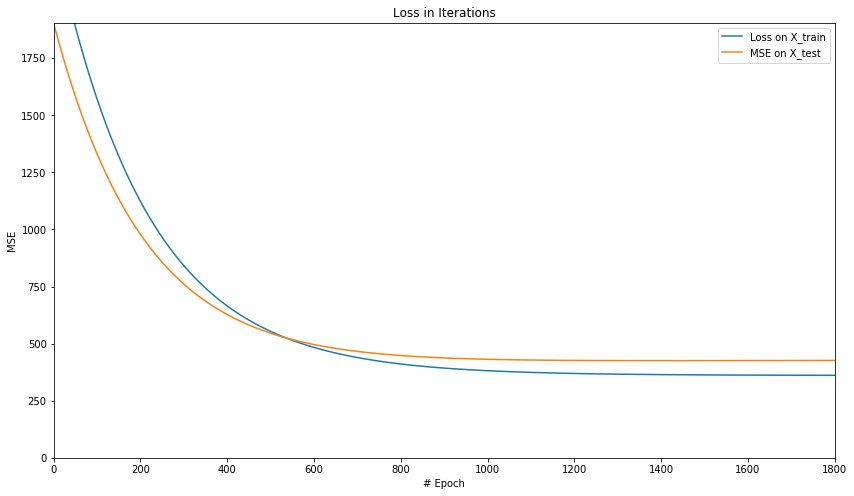

In [30]:
plot.figure(figsize=(14, 8))

plot.axis([0, num_epochs, 0, np.max(loss_epochs)])
plot.plot(loss_epochs, label='Loss on X_train')
plot.title('Loss in Iterations')
plot.xlabel('# Epoch')
plot.ylabel('MSE')

plot.axis([0, num_epochs, 0, np.max(mse_epochs)])
plot.plot(mse_epochs, label='MSE on X_test')
plot.xlabel('# Epoch')
plot.ylabel('MSE')
plot.legend()

plot.show()

### R^2 on test

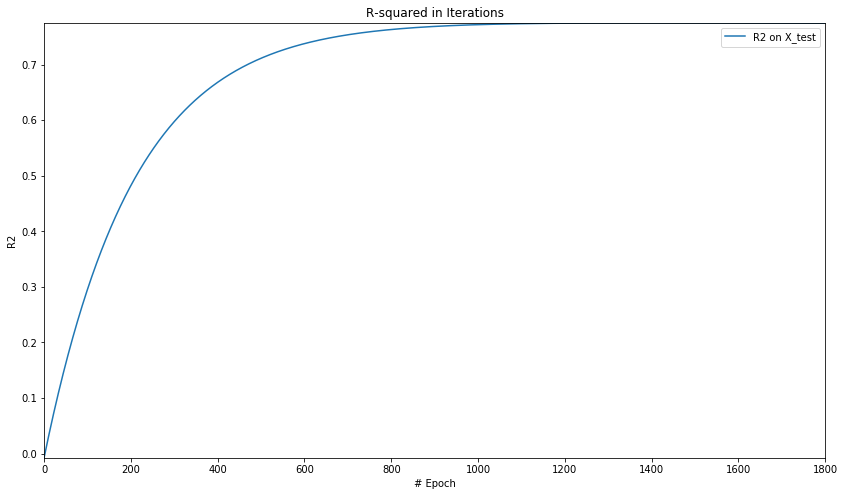

In [31]:
plot.figure(figsize=(14, 8))

plot.axis([0, num_epochs, np.min(rs_epochs), np.max(rs_epochs)])
plot.title('R-squared in Iterations')
plot.plot(rs_epochs, label='R2 on X_test')
plot.xlabel('# Epoch')
plot.ylabel('R2')
plot.legend()

plot.show()